# Reaction rates of all reaction involving $CH_4$
**Alice Barbarino and Maria Crist**

This notebook presents the processing workflow for the results of the reactive molecular dynamics simulations performed with LAMMPS. The auxiliary script `reaction_rates_aux.py` contains the functions used in the analyses. Additionally, the `.html` analysis report generated with ReacNetGenerator from the `dump` file is also available in the repository.


## Imports

In [1]:
import re
import matplotlib.pyplot as plt
from parse import search
from collections import defaultdict
from reaction_rates_aux import *

## Variables

In [3]:
Temperatures = [700, 900, 1300, 1500, 2000, 2300, 2500]
concentrations = [10, 40, 60]

ch4_patterns = ['[H][C]([H])([H])[H]', '[H][H]([H])([H])[C]'] #more than one possible representation

## Exploring the reactions

In [5]:
#nested dict to store all results
all_results = defaultdict(dict)

for T in Temperatures:
    for c in concentrations:
        file_name = f"ch4_all_reactions{T}K_{c}ch4.txt"
        
        with open(file_name, 'r', encoding='utf-8') as f:
            content = f.read()

        # patter to capture reactions and their values
        patter = r"^(.+?)\s+(\d+(?:\.\d+)?(?:[eE][+-]?\d+)?)\s*$"
        
        for match in re.finditer(patter, content, re.MULTILINE):
            reaction = match.group(1).strip()
            number = float(match.group(2))
            
            all_results[reaction][(T, c)] = number

print(f"Total reactions found: {len(all_results)}")
for key in all_results.keys():
    print(key)

Total reactions found: 97
[H][C]([H])([H])[H]->[H]+[H][C]([H])[H]
[H]+[H][C]([H])[H]->[H][C]([H])([H])[H]
[H][C]([H])([H])[H]+[N][N][N][N]->[H][C]([H])[H]+[H][N][N][N][N]
[H][C]([H])[H]+[H][N][N][N][N]->[H][C]([H])([H])[H]+[N]#[N]+[N]#[N]
[H][C]([H])([H])[H]+[N]#[N]+[N]#[N]->[H][C]([H])[H]+[H][N][N]=[N][N]
[H][C]([H])[H]+[H][N][N]=[N][N]->[H][C]([H])([H])[H]+[N]#[N]+[N]#[N]
[H][C]([H])([H])[H]+[N]#[N]->[H][C]([H])[H]+[H][N][N]
[H][C]([H])[H]+[H][N][N]->[H][C]([H])([H])[H]+[N]#[N]
[H][H]([H])([H])[C]->[H]+[H][H]([H])[C]
[H]+[H][H]([H])[C]->[H][H]([H])([H])[C]
[H][H]([H])([H])[C]->[C]+[H][H]([H])[H]
[C]+[H][H]([H])[H]->[H][H]([H])([H])[C]
[H][H]([H])([H])[C]+[N]#[N]->[H][H]([H])[C]+[H][N][N]
[H][H]([H])[C]+[H][N][N]->[H][H]([H])([H])[C]+[N]#[N]
[H][C]([H])[H]+[H][N][N][H]->[H][C]([H])([H])[H]+[H][N][N]
[H][C]([H])([H])[H]+[H][N][N]->[H][C]([H])[H]+[H][N][N][H]
[H][C]([H])([H])[H]+[H][N]=[N]->[H][C]([H])[H]+[H][N][N][H]
[H][C]([H])([H])[H]+[H][C]([H])[O][O]->[H][C]([H])[H]+[H][O][O][C]([H

In [7]:
# Filter reactions: only reaction with no nitrogen and CH4 as reactant
filtered_reactions = {}
for reac, data in all_results.items():
    if has_nitrogen(reac):
        continue
    #if not is_ch4_reactant(reac):
     #   continue
    if data:
        filtered_reactions[reac] = data
print(len(filtered_reactions))

46


In [8]:
# Since many reactions only occur once, filtering them out
filtered_data = {k: v for k, v in filtered_reactions.items() if len(v) > 1}

## Plotting the unique reactions of interest

Reaction Group Analysis:

Equivalent representations found (2 variants):
Canonical reaction: $CH_{4}$ → $CH_{3}$ + $H$
Original strings:
  1. [H][C]([H])([H])[H]->[H]+[H][C]([H])[H]
  2. [H][H]([H])([H])[C]->[H]+[H][H]([H])[C]

Equivalent representations found (2 variants):
Canonical reaction: $CH_{3}$ + $H$ → $CH_{4}$
Original strings:
  1. [H]+[H][C]([H])[H]->[H][C]([H])([H])[H]
  2. [H]+[H][H]([H])[C]->[H][H]([H])([H])[C]

Equivalent representations found (2 variants):
Canonical reaction: $CH_{4}$ + $H$ → $CH_{3}$ + $H_{2}$
Original strings:
  1. [H]+[H][H]([H])([H])[C]->[H][H]+[H][H]([H])[C]
  2. [H]+[H][C]([H])([H])[H]->[H][C]([H])[H]+[H][H]

Equivalent representations found (2 variants):
Canonical reaction: $CH_{4}$ + $O$ → $CH_{3}$ + $HO$
Original strings:
  1. [H][C]([H])([H])[H]+[O]->[H][C]([H])[H]+[H][O]
  2. [H][H]([H])([H])[C]+[O]->[H][H]([H])[C]+[H][O]

Equivalent representations found (2 variants):
Canonical reaction: $CH_{4}$ + $HO$ → $CH_{3}$ + $H_{2}O$
Original strings

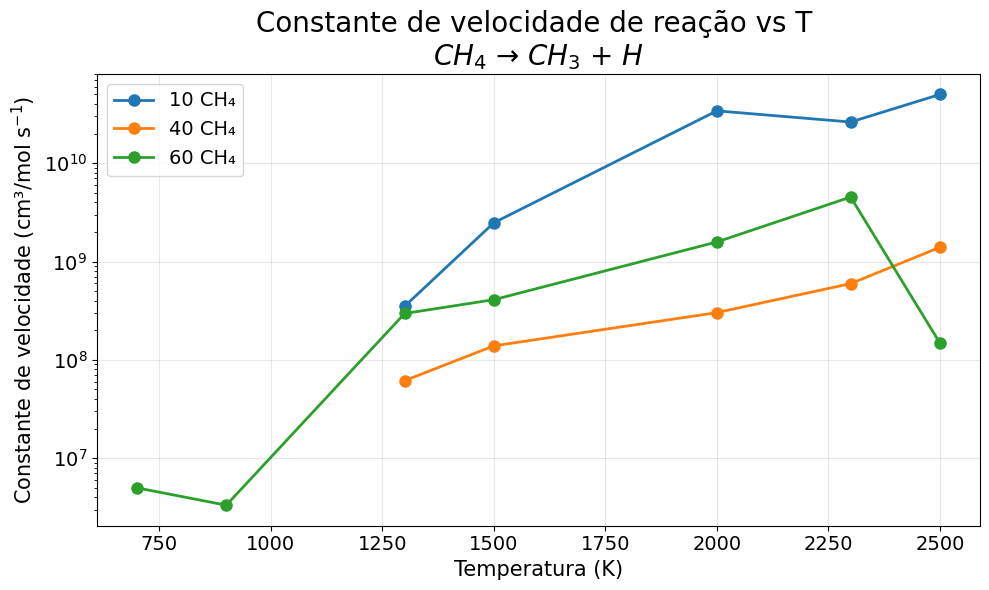


--- $CH_{3}$ + $H$ → $CH_{4}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
700       	60        	1.445e+20
900       	60        	1.927e+20
1300      	10        	1.489e+20
1300      	40        	1.927e+19
1300      	60        	1.777e+18
1500      	10        	6.036e+18
1500      	40        	4.526e+16
1500      	60        	1.523e+17
2000      	10        	9.063e+16
2000      	40        	1.298e+15
2000      	60        	3.021e+16
2300      	10        	4.372e+16
2300      	40        	2.203e+15
2300      	60        	6.915e+15
2500      	10        	3.929e+16
2500      	40        	3.010e+15
2500      	60        	6.592e+13


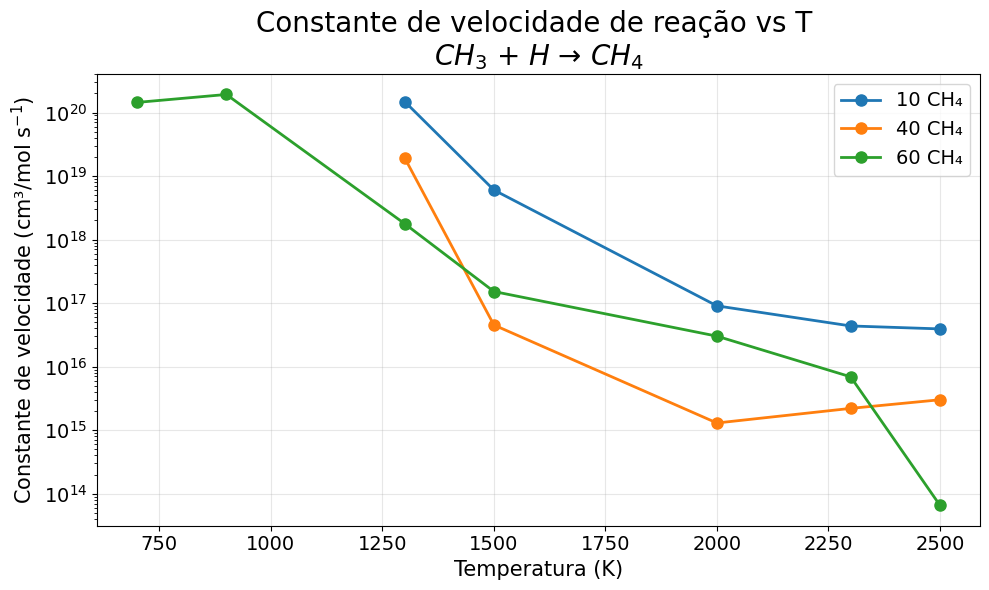


--- $CH_{4}$ → $C$ + $H_{4}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1300      	40        	1.538e+07
1500      	40        	3.156e+07
2000      	40        	1.289e+08
2300      	40        	2.029e+08
2500      	40        	2.958e+08


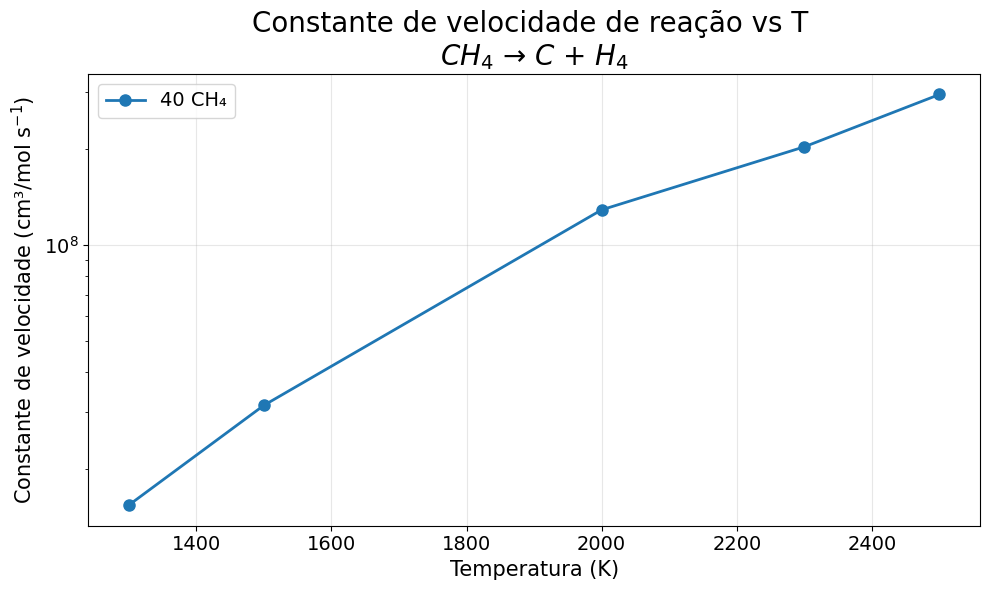


--- $C$ + $H_{4}$ → $CH_{4}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1300      	40        	1.927e+19
1500      	40        	4.159e+16
2000      	40        	2.276e+16
2300      	40        	1.331e+16
2500      	40        	2.898e+15


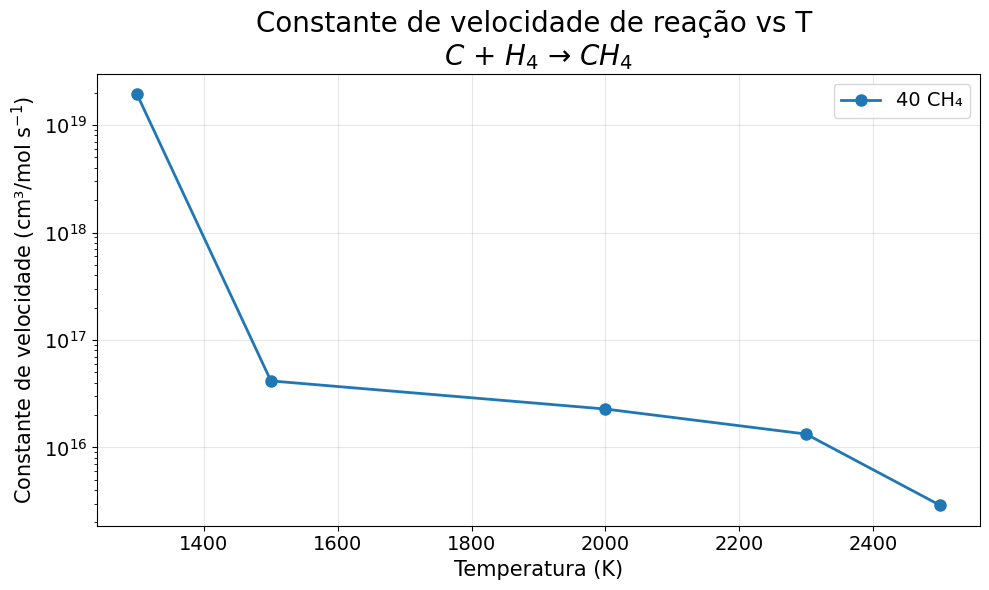


--- $CH_{4}$ + $H$ → $CH_{3}$ + $H_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	40        	2.173e+14
1500      	60        	5.197e+13
2000      	10        	5.543e+14
2000      	40        	8.012e+12
2000      	60        	4.149e+13
2300      	10        	3.086e+13
2300      	40        	3.079e+13
2300      	60        	6.171e+13
2500      	40        	1.675e+13
2500      	60        	4.590e+13


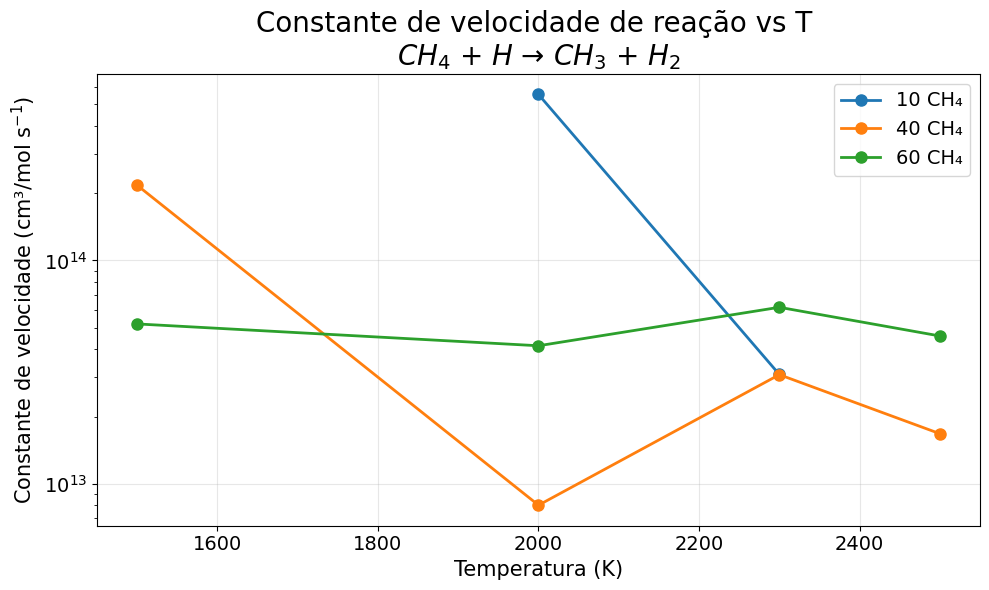


--- $CH_{4}$ + $H$ → $C$ + $H_{5}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	40        	1.087e+14
2000      	40        	8.012e+12
2300      	40        	2.053e+13


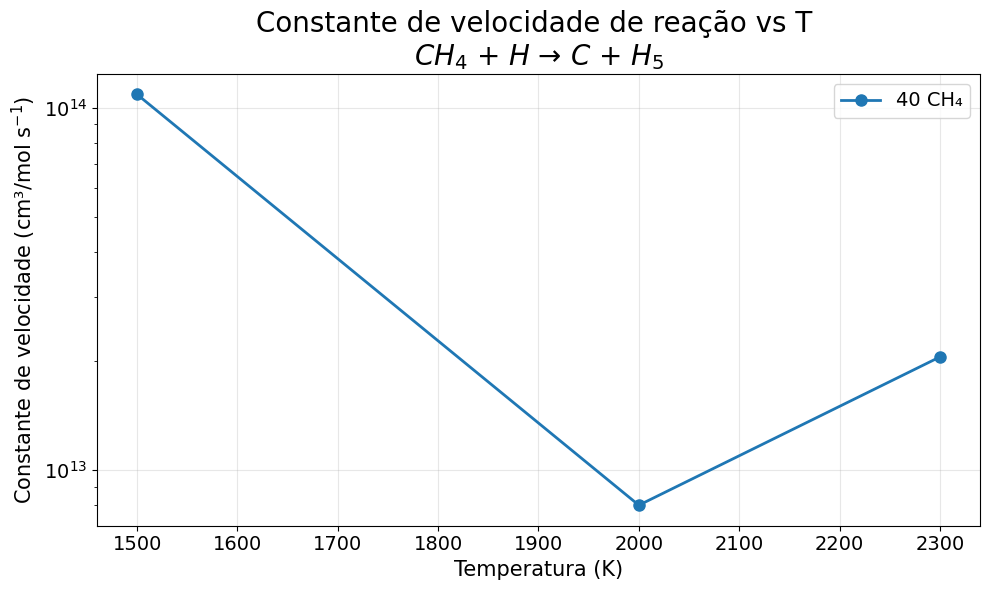


--- $CH_{4}$ + $O$ → $CH_{3}$ + $HO$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	60        	4.525e+14
2000      	10        	7.154e+13
2000      	40        	9.333e+13
2000      	60        	1.210e+14
2300      	40        	5.007e+13
2300      	60        	1.801e+14
2500      	10        	1.269e+14
2500      	40        	3.479e+13
2500      	60        	5.386e+13


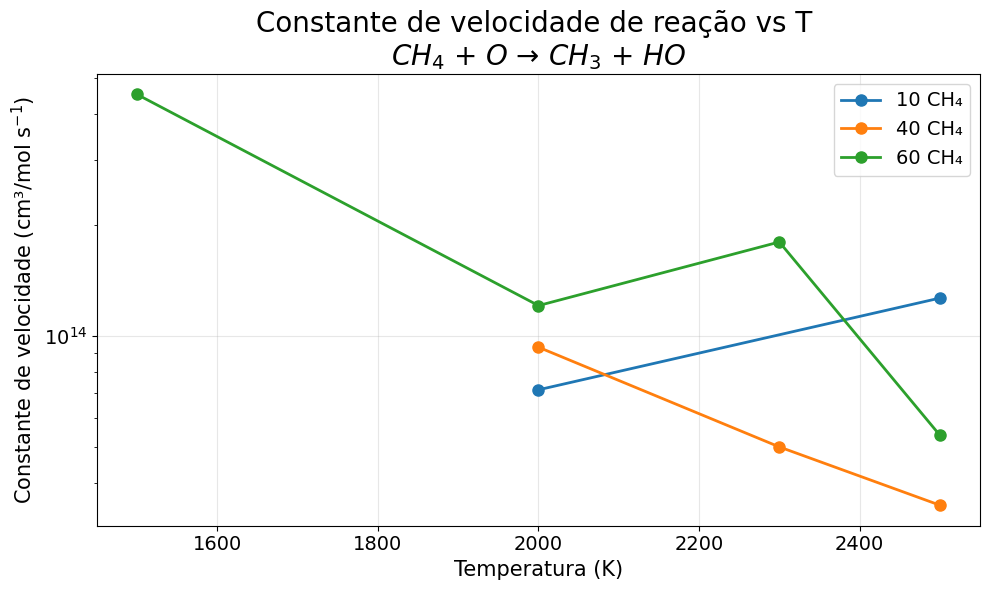


--- $CH_{4}$ + $HO$ → $CH_{3}$ + $H_{2}O$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	60        	8.997e+12
2000      	10        	6.348e+13
2000      	40        	7.649e+13
2000      	60        	1.731e+13
2300      	60        	3.342e+13
2500      	40        	3.847e+13
2500      	60        	4.906e+13


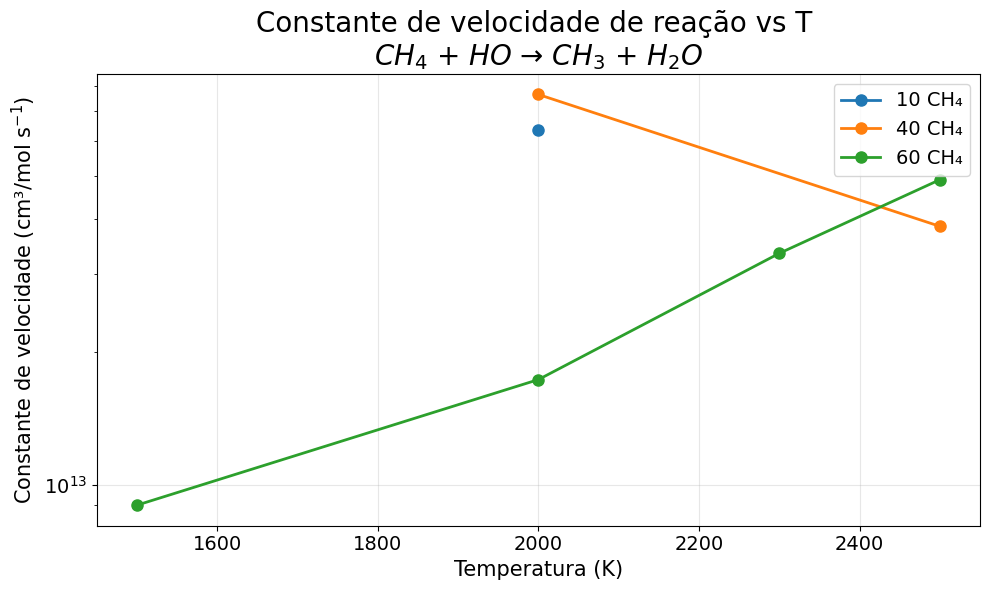


--- $CH_{4}$ + $HO$ → $CH_{4}O$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	60        	8.997e+12
2300      	60        	6.016e+13


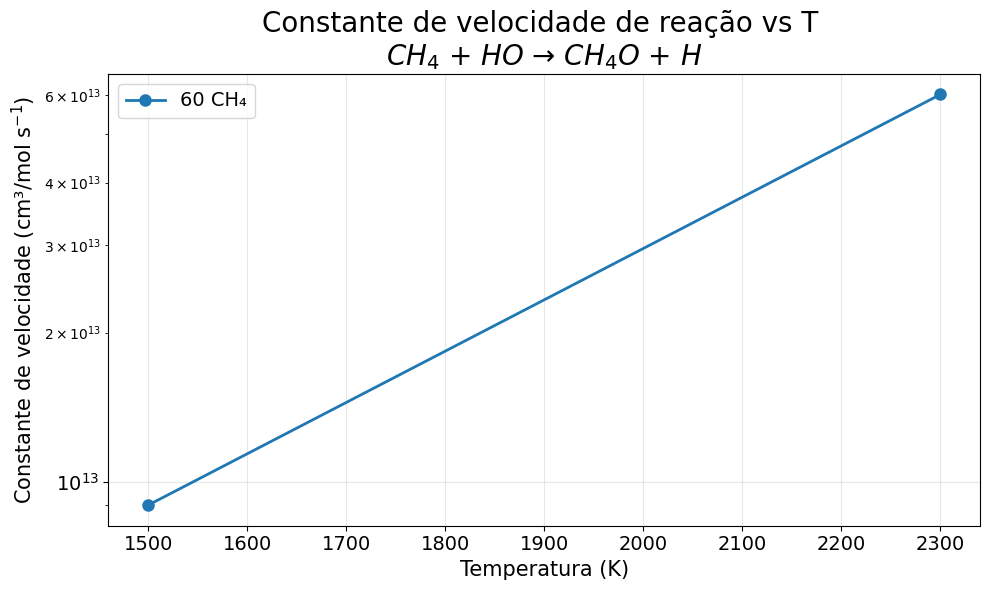


--- $CH_{4}O$ + $H$ → $CH_{4}$ + $HO$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
1500      	60        	9.635e+19
2300      	60        	1.493e+15


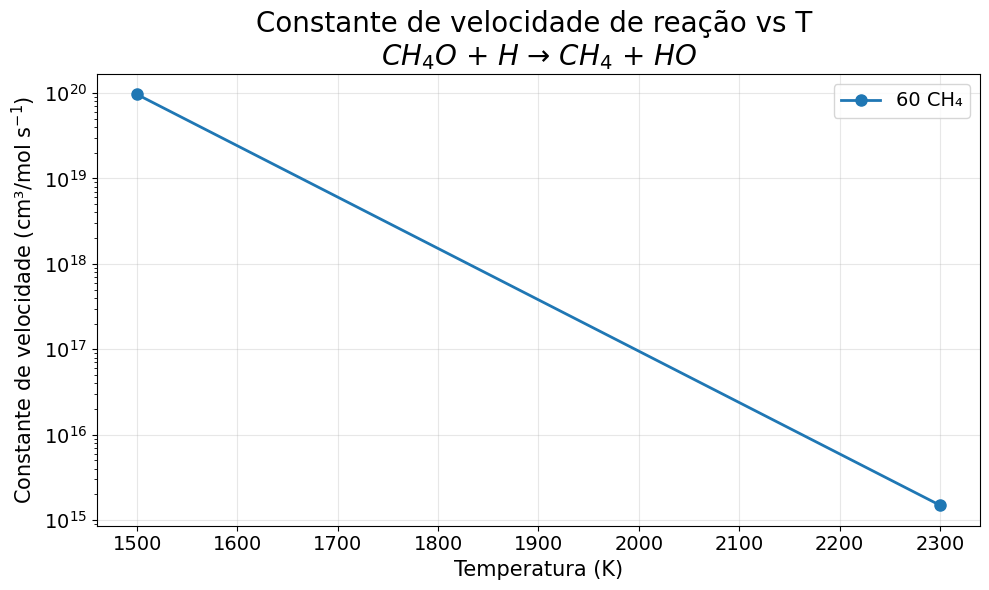


--- $CH_{4}$ → $CH_{2}$ + $H$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	10        	6.065e+07
2300      	60        	4.068e+06


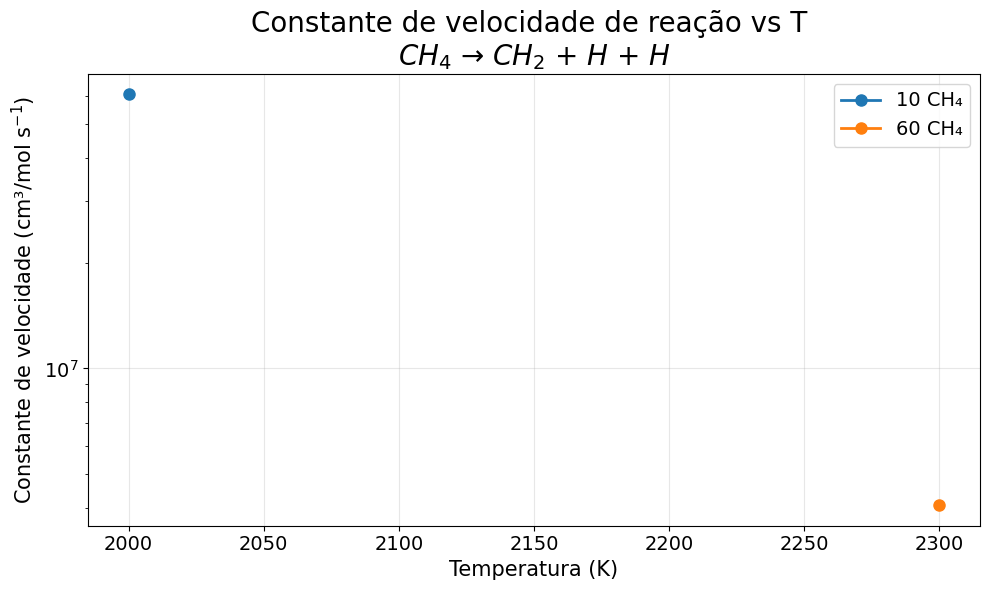


--- $CH_{4}$ + $O$ → $CH_{2}O$ + $H_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	10        	7.154e+13
2000      	40        	4.666e+13
2000      	60        	2.421e+13
2300      	40        	1.001e+14
2300      	60        	2.573e+13
2500      	40        	3.479e+13
2500      	60        	5.386e+13


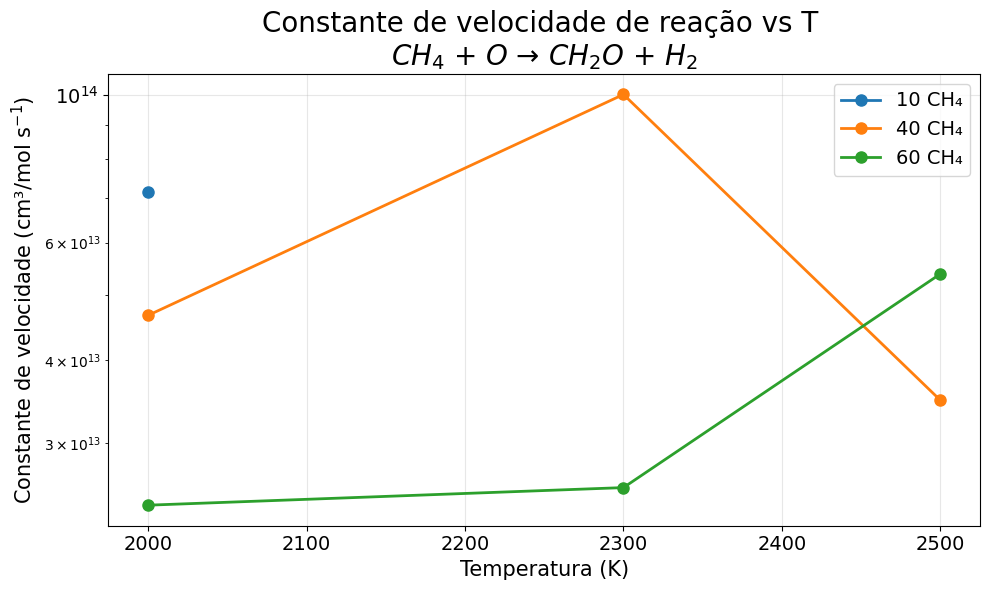


--- $CH_{4}$ + $O$ → $CH_{3}O$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	40        	4.666e+13
2000      	60        	2.421e+13
2300      	10        	1.847e+14
2300      	60        	5.145e+13
2500      	10        	1.269e+14
2500      	40        	3.479e+13


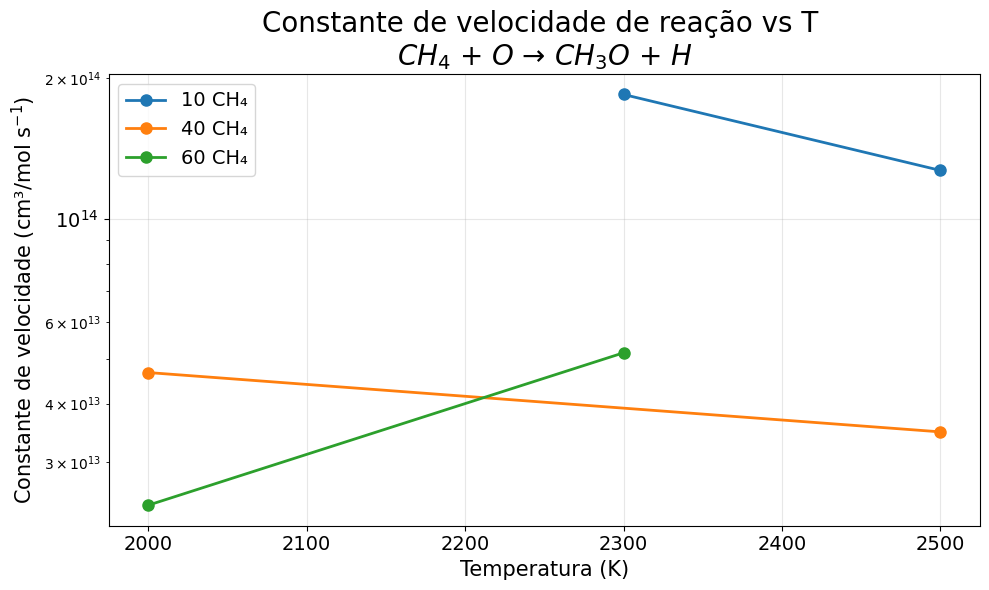


--- $CH_{4}$ + $O$ → $CO$ + $H_{4}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	40        	4.666e+13
2500      	40        	6.959e+13


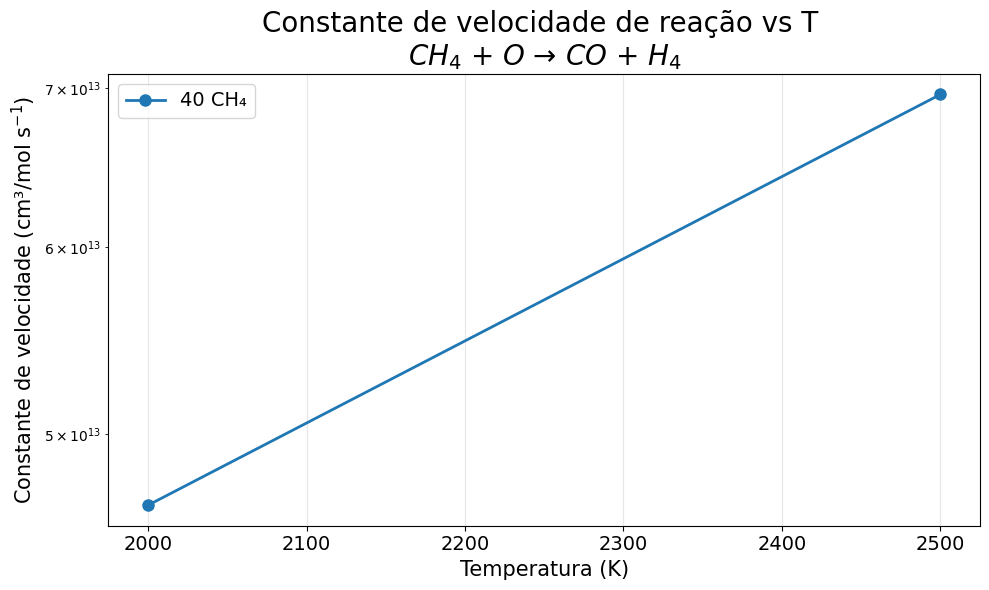


--- $C$ + $CH_{4}$ → $C_{2}H_{3}$ + $H$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	40        	4.623e+13
2300      	40        	5.260e+13
2500      	40        	1.680e+14


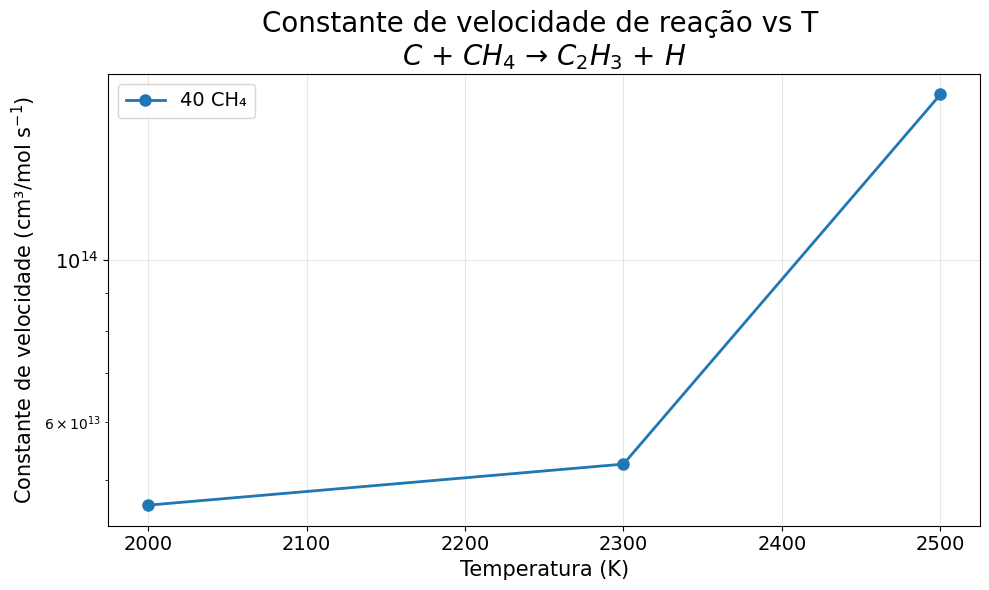


--- $C_{2}H_{3}$ + $H$ → $C$ + $CH_{4}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2000      	40        	7.051e+15
2500      	40        	1.807e+14


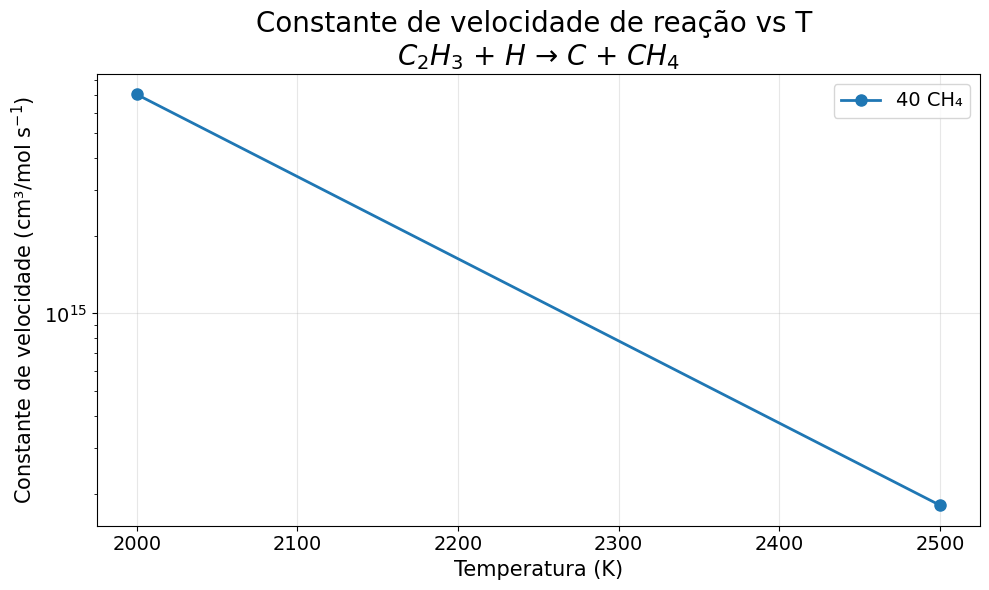


--- $CH_{4}$ → $CH_{2}$ + $H_{2}$ ---
Temp (K)	CH₄ Conc	Rate (cm³/mol·s⁻¹)
---------------------------------------------
2500      	10        	6.839e+07
2500      	60        	1.856e+07


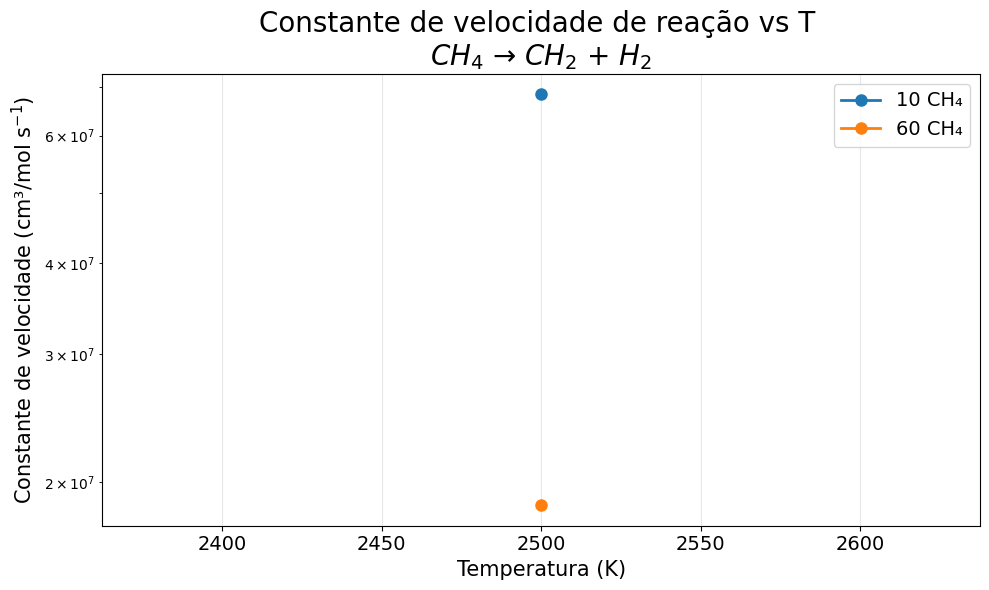

In [9]:
# Grouping data (see .py file for more detail)
groups = analyze_reaction_equivalences(filtered_data)

# Aggregate the rates
aggregated = aggregate_reaction_rates(filtered_data)

print(f"\nOriginal number of reaction strings: {len(filtered_data)}")
print(f"Number of unique chemical reactions: {len(aggregated)}")

# Plot aggregated reactions
plot_aggregated_reactions(aggregated)